In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
import statsmodels.formula.api as smf
import os
import seaborn as sn
import statsmodels.api as sm

In [4]:
pwd

'C:\\Users\\hp\\Documents'

In [6]:
os.listdir('C:/Users/hp/downloads')

['.ipynb_checkpoints',
 '2032052303512.pdf',
 '2032052303512~1.pdf',
 '2032052303512~2.pdf',
 '789704_Claim_Request_Form_Blank.pdf',
 'AADHAR UPDATION APP.FORM.pdf',
 'acknowledgement-1686798024919.pdf',
 'Adarsh CV--1.pdf',
 'Adarsh8076.pem',
 'Adarsh8076.rar',
 'Adarsh8076.zip',
 'Adobe Scan 25-Jul-2023 (4)_1 (1).jpg',
 'Adobe Scan 25-Jul-2023 (4)_1.jpg',
 'Adobe Scan 25-Jul-2023 (6)_1.pdf',
 'Advance may 2022.pdf',
 'advance may 2023.pdf',
 'Advance nov 2021.pdf',
 'Advance nov 2022.pdf',
 'Anaconda3-2023.03-1-Windows-x86_64.exe',
 'annual-enterprise-survey-2021-financial-year-provisional-csv.csv',
 'annual-enterprise-survey-2021-financial-year-provisional-size-bands-csv.csv',
 'archive.zip',
 'Assignment (1).docx',
 'Assignment 2.ipynb',
 'Assignment 3.ipynb',
 'Assignment.docx',
 'Audit may 2022.pdf',
 'Audit may 2023.pdf',
 'Audit nov 2022.pdf',
 'Basic_statsitics_level 1 (1).docx',
 'Basic_statsitics_level 1.docx',
 'BingWallpaper.exe',
 'Book3.xlsx',
 'business-employment-data-

In [8]:
deliv=pd.read_csv('C:/Users/hp/downloads/delivery_time.csv')

In [9]:
deliv

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA Analyisi

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

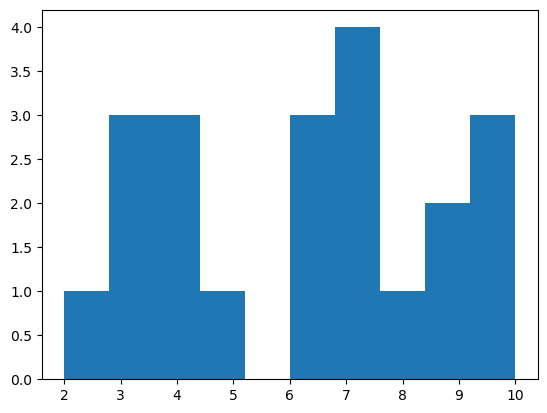

In [10]:
plt.hist(deliv['Sorting Time'])

Text(0.5, 1.0, 'Time')

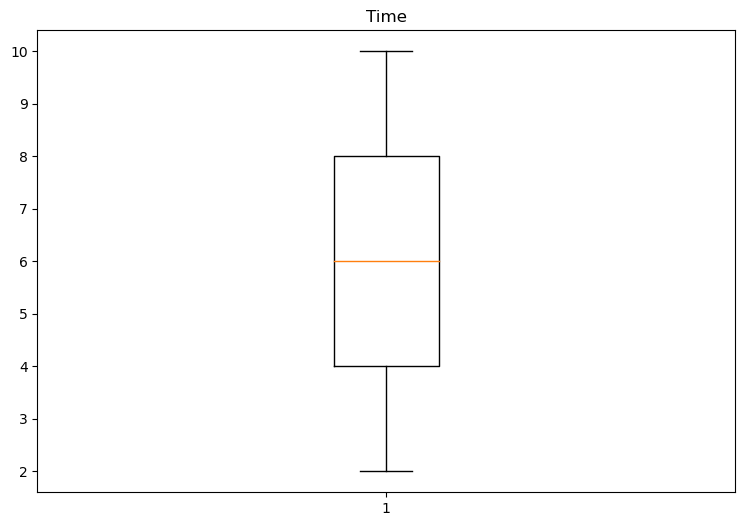

In [11]:
plt.subplots(figsize=(9,6))
plt.boxplot(deliv['Sorting Time'])
plt.title('Time')

Text(0.5, 1.0, 'Delivery time')

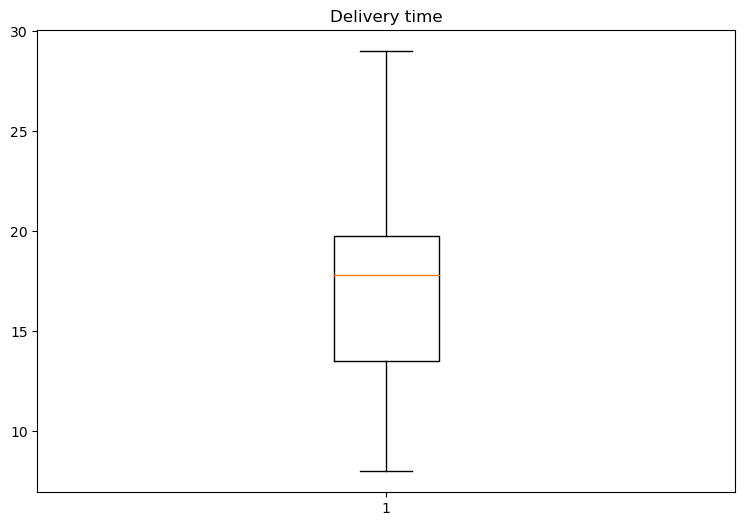

In [23]:
plt.subplots(figsize=[9,6])
plt.boxplot(deliv['Delivery Time'])
plt.title('Delivery time')

C:\Users\hp\AppData\Local\Temp\ipykernel_2668\1395443122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(deliv['Sorting Time'])


AttributeError: module 'seaborn' has no attribute 'legend'

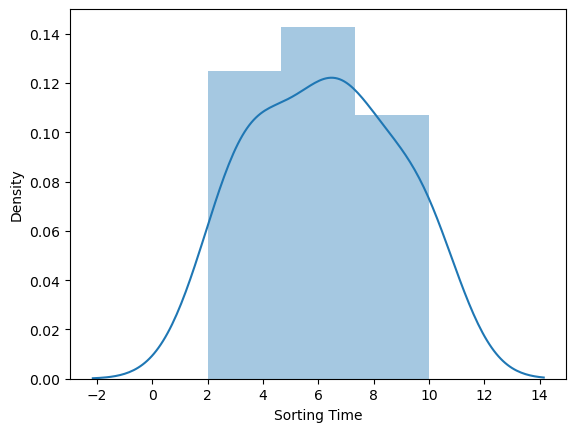

In [16]:

labels=['Time']
sn.distplot(deliv['Sorting Time'])
sn.legend(labels)


C:\Users\hp\AppData\Local\Temp\ipykernel_2668\1861850642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(deliv['Delivery Time'])


AttributeError: module 'seaborn' has no attribute 'legends'

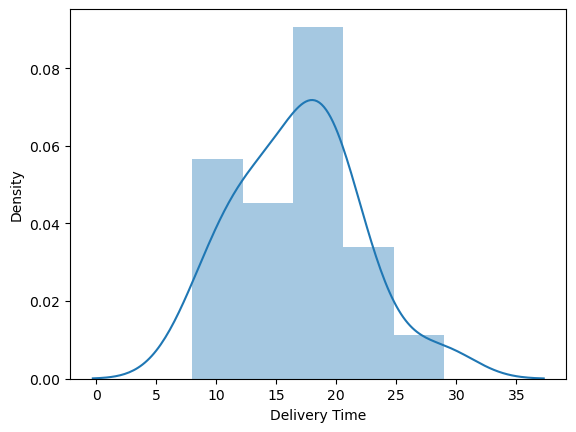

In [24]:
lables='Delivery time'
sn.distplot(deliv['Delivery Time'])
sn.legends(labels)

Text(0.5, 1.0, 'Sorting Time')

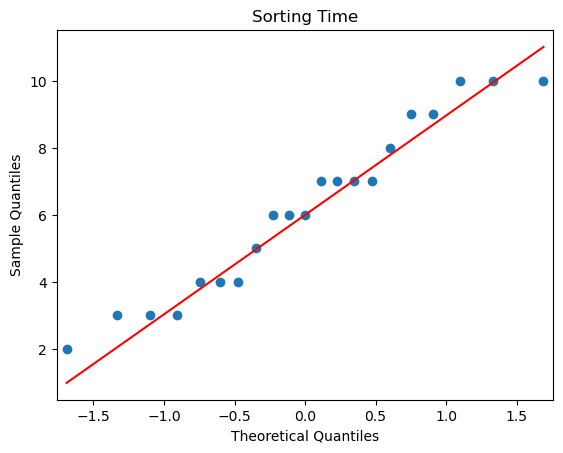

In [19]:
sm.qqplot(deliv['Sorting Time'],line='q')
plt.title('Sorting Time')

Text(0.5, 1.0, 'Delivery time')

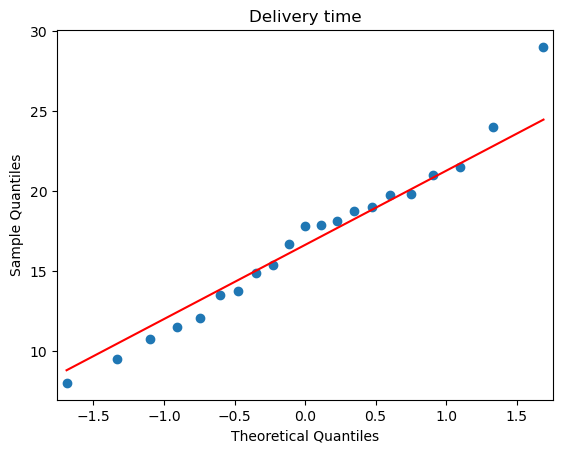

In [27]:
sm.qqplot(deliv['Delivery Time'],line='q')
plt.title('Delivery time')

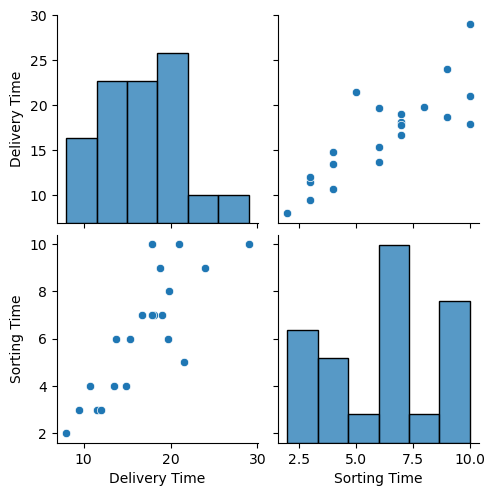

In [35]:
sn.pairplot(deliv)

# Correlation analysis

In [28]:
deliv.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

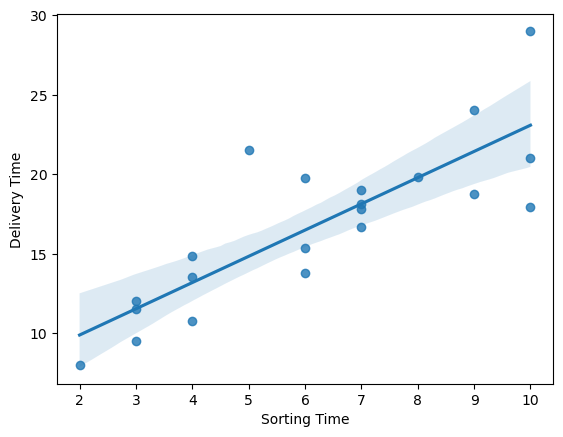

In [30]:
sn.regplot(x=deliv['Sorting Time'],y=deliv['Delivery Time'])

In [36]:
dataset=deliv.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# MODEL BUILDING

In [39]:
modeld=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [40]:
modeld.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [42]:
modeld.tvalues,modeld.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [43]:
modeld.rsquared

0.6822714748417231

In [44]:
new_data=pd.Series([5,10])

In [45]:
data_pred=pd.DataFrame(new_data, columns=['sorting_time'])

In [46]:
data_pred

,sorting_time
0,5
1,10


In [47]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

# Question 2

In [48]:
Salary=pd.read_csv('C:/Users/hp/downloads/Salary_Data.csv')

In [49]:
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# EDA Analyis

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

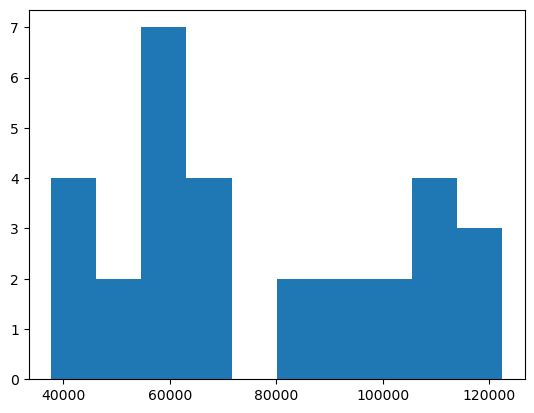

In [52]:
plt.hist(Salary['Salary'])

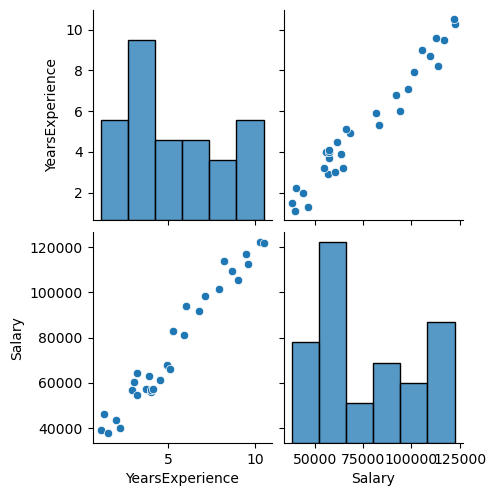

In [53]:
sn.pairplot(Salary)

C:\Users\hp\AppData\Local\Temp\ipykernel_2668\3370301547.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(Salary['Salary'])


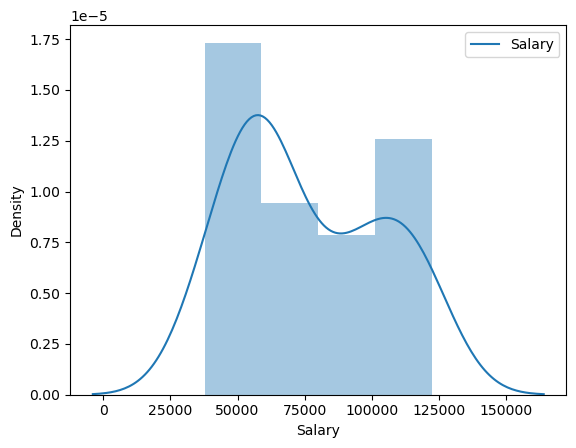

In [58]:
labels=['Salary']
sn.distplot(Salary['Salary'])
plt.legend(labels)

# Correlation analysis

In [59]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

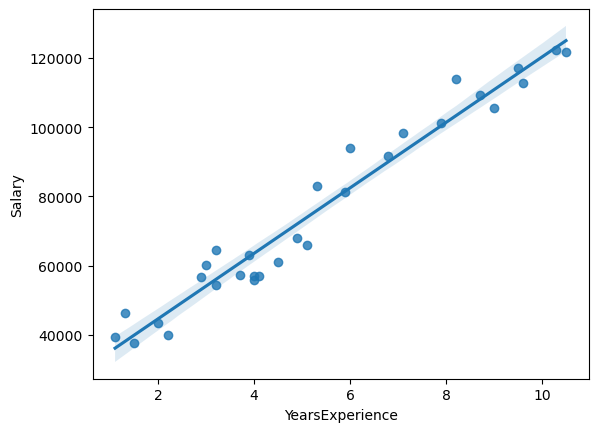

In [60]:
sn.regplot(x=Salary['YearsExperience'],y=Salary['Salary'])

In [62]:
dataset=Salary.rename({'Salary':'salary_year','YearsExperience':'years_experience'},axis=1)
dataset

,years_experience,salary_year
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Model Building

In [63]:
models=smf.ols('salary_year~years_experience',data=dataset).fit()

In [64]:
models

In [66]:
models.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [67]:
models.tvalues,models.pvalues

(Intercept           11.346940
 years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 years_experience    1.143068e-20
 dtype: float64)

In [68]:
models.rsquared

0.9569566641435086

In [69]:
new_salary=pd.Series([1,11])

In [70]:
salary_pred=pd.DataFrame(new_salary,columns=['years_experience'])

In [71]:
models.predict(salary_pred)

0     35242.162520
1    129741.785735
dtype: float64